In [1]:
#Step 1: Import Python Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Step 2: Reading Dataset

data = pd.read_csv(r"C:\hotel_reviews.csv")

In [3]:
#Step 3: Analyzing the Data

In [4]:
data.head()

,Index,Name,Area,Review_Date,Rating_attribute,Rating(Out of 10),Review_Text
0,0,Hotel The Pearl,"Paharganj, New Delhi",Jul-23,Best budget friendly hotel,9.0,Hotel the pearl is perfect place to stay in De...
1,1,Hotel The Pearl,"Paharganj, New Delhi",Aug-23,Amazing place,9.0,Location of the hotel is perfect. The hotel is...
2,2,Hotel The Pearl,"Paharganj, New Delhi",Aug-23,Overall good stay. Economic.,9.0,"Location, Indian food."
3,3,Hotel The Pearl,"Paharganj, New Delhi",Aug-23,Lovely,9.0,The location and the hotel itself is great. Ne...
4,4,Hotel The Pearl,"Paharganj, New Delhi",Aug-23,Great hotel Great staff and great staying,9.0,Friendly and smiling staffs.. The reception st...


In [5]:
data.shape

(7001, 7)

In [6]:
data.head()

,Index,Name,Area,Review_Date,Rating_attribute,Rating(Out of 10),Review_Text
0,0,Hotel The Pearl,"Paharganj, New Delhi",Jul-23,Best budget friendly hotel,9.0,Hotel the pearl is perfect place to stay in De...
1,1,Hotel The Pearl,"Paharganj, New Delhi",Aug-23,Amazing place,9.0,Location of the hotel is perfect. The hotel is...
2,2,Hotel The Pearl,"Paharganj, New Delhi",Aug-23,Overall good stay. Economic.,9.0,"Location, Indian food."
3,3,Hotel The Pearl,"Paharganj, New Delhi",Aug-23,Lovely,9.0,The location and the hotel itself is great. Ne...
4,4,Hotel The Pearl,"Paharganj, New Delhi",Aug-23,Great hotel Great staff and great staying,9.0,Friendly and smiling staffs.. The reception st...


In [7]:
data.tail()

,Index,Name,Area,Review_Date,Rating_attribute,Rating(Out of 10),Review_Text
6996,6996,FabHotel F9 NSP,"North Delhi, New Delhi",Aug-23,I'd like to thank Manager.,10.0,"The room was good, comfortable and aesthetic \..."
6997,6997,FabHotel F9 NSP,"North Delhi, New Delhi",Jul-23,Superb,9.0,good hotel
6998,6998,FabHotel F9 NSP,"North Delhi, New Delhi",Jul-23,fabulous,10.0,good experience for me about hotel \nvery good...
6999,6999,FabHotel F9 NSP,"North Delhi, New Delhi",Jun-23,well done,10.0,well done
7000,7000,FabHotel F9 NSP,"North Delhi, New Delhi",Jul-23,Bad,2.0,Nothing


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7001 entries, 0 to 7000
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Index              7001 non-null   int64  
 1   Name               7001 non-null   object 
 2   Area               7001 non-null   object 
 3   Review_Date        7001 non-null   object 
 4   Rating_attribute   7001 non-null   object 
 5   Rating(Out of 10)  7001 non-null   float64
 6   Review_Text        6994 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 383.0+ KB


In [9]:
#Check for Duplication
data.nunique()

Index                7001
Name                  570
Area                   31
Review_Date            36
Rating_attribute     1875
Rating(Out of 10)      12
Review_Text          3902
dtype: int64

In [10]:
#Missing Values Calculation
data.isnull().sum()

Index                0
Name                 0
Area                 0
Review_Date          0
Rating_attribute     0
Rating(Out of 10)    0
Review_Text          7
dtype: int64

In [11]:
#The below code helps to calculate the percentage of missing values in each column
(data.isnull().sum()/(len(data)))*100

Index                0.000000
Name                 0.000000
Area                 0.000000
Review_Date          0.000000
Rating_attribute     0.000000
Rating(Out of 10)    0.000000
Review_Text          0.099986
dtype: float64

In [12]:
#Let’s split the name and introduce new variables “Brand” and “Model”
data['Brand'] = data.Name.str.split().str.get(0)

In [13]:
data['Model'] = data.Name.str.split().str.get(1) + data.Name.str.split().str.get(2)

In [14]:
data[['Name','Brand','Model']]

,Name,Brand,Model
0,Hotel The Pearl,Hotel,ThePearl
1,Hotel The Pearl,Hotel,ThePearl
2,Hotel The Pearl,Hotel,ThePearl
3,Hotel The Pearl,Hotel,ThePearl
4,Hotel The Pearl,Hotel,ThePearl
...,...,...,...
6996,FabHotel F9 NSP,FabHotel,F9NSP
6997,FabHotel F9 NSP,FabHotel,F9NSP
6998,FabHotel F9 NSP,FabHotel,F9NSP
6999,FabHotel F9 NSP,FabHotel,F9NSP


In [15]:
#Step 7: Data Cleaning/Wrangling
#In the example, The brand name ‘Isuzu’ ‘ISUZU’ and ‘Mini’ and ‘Land’ looks incorrect. This needs to be corrected
print(data.Brand.unique())
print(data.Brand.nunique())

['Hotel' 'FabHotel' 'Holiday' 'Airport' 'Novotel' 'Trimrooms' 'Itsy'
 'HOTEL' 'Four' 'Iconic' 'Ambassador,' 'The' 'Hyatt' 'Aloft' 'Delhi'
 'Cosy' 'New' 'Anchal' 'OYO' 'Park' 'Shri' 'Manaya' 'Radisson' "Joey's"
 'Avatar' 'Hilton' 'Vivanta' 'Pullman' 'Frank' 'Roomshala' 'Thikana'
 'Hindustan' 'J' 'Qotel' 'JW' 'THE' 'Deluxe' 'Yes' 'LetsBunk' 'Townhouse'
 'FabExpress' 'Jaypee' '3bhk' 'Majestic' 'SURYA' 'Silver' 'Pamposh' 'Bed'
 'Gallivanto' 'Staybook' 'Bloomrooms' 'A' 'SCOOVEY' 'Treebo' 'Friends'
 'Apple' 'ibis' 'Peepal' 'Trendy' 'Lemon' 'NUO' 'hotel' 'Maidens' 'Raj'
 'POP' 'Super' 'Niv' 'Aero' 'AmigosIndia' 'Aashianaa' 'MOYDOM' 'Studio'
 'Bungalow' 'Mandakini' 'Mayda' 'Bloom' 'Boutique' 'Taurus' 'Ginger'
 'Vrindavan' 'Sarthak' 'JSK' 'Taj' 'Hari' 'VRINDAVAN' 'Tatvamasi' 'ITC'
 'Amax' 'bloomrooms' 'Happy' 'Grand' 'Collection' 'Zaza' 'Ahuja' 'Satvik'
 'Royal' 'Wongdhen' 'Avalon' 'Green' 'Tree' 'SPOT' 'Sprinklers' 'Bewafa'
 'Kelvish' 'Ever' 'Vinanda' 'Sailors' 'Frankstay' 'Udman' 'Eros' 'Homl

In [16]:
searchfor = ['Isuzu' ,'ISUZU','Mini','Land']
data[data.Brand.str.contains('|'.join(searchfor))].head(5)

,Index,Name,Area,Review_Date,Rating_attribute,Rating(Out of 10),Review_Text,Brand,Model


In [17]:
data["Brand"].replace({"ISUZU": "Isuzu", "Mini": "Mini Cooper","Land":"Land Rover"}, inplace=True)

In [18]:
data.head()

,Index,Name,Area,Review_Date,Rating_attribute,Rating(Out of 10),Review_Text,Brand,Model
0,0,Hotel The Pearl,"Paharganj, New Delhi",Jul-23,Best budget friendly hotel,9.0,Hotel the pearl is perfect place to stay in De...,Hotel,ThePearl
1,1,Hotel The Pearl,"Paharganj, New Delhi",Aug-23,Amazing place,9.0,Location of the hotel is perfect. The hotel is...,Hotel,ThePearl
2,2,Hotel The Pearl,"Paharganj, New Delhi",Aug-23,Overall good stay. Economic.,9.0,"Location, Indian food.",Hotel,ThePearl
3,3,Hotel The Pearl,"Paharganj, New Delhi",Aug-23,Lovely,9.0,The location and the hotel itself is great. Ne...,Hotel,ThePearl
4,4,Hotel The Pearl,"Paharganj, New Delhi",Aug-23,Great hotel Great staff and great staying,9.0,Friendly and smiling staffs.. The reception st...,Hotel,ThePearl


In [19]:
#Step 7: EDA Exploratory Data Analysis
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Index,7001.0,3500.000000,2021.158950,0.0,1750.0,3500.0,5250.0,7000.0
Rating(Out of 10),7001.0,7.030981,2.882846,1.0,6.0,8.0,9.0,10.0


In [20]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Index,7001.0,NaN,NaN,NaN,3500.0,2021.15895,0.0,1750.0,3500.0,5250.0,7000.0
Name,7001,570,OYO Townhouse 023 CR Park Near Lotus Temple,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Area,7001,31,"South Delhi, New Delhi",1394,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Review_Date,7001,36,Aug-23,1560,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rating_attribute,7001,1875,Exceptional,772,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rating(Out of 10),7001.0,NaN,NaN,NaN,7.030981,2.882846,1.0,6.0,8.0,9.0,10.0
Review_Text,6994,3902,no comments available for this review,632,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Brand,7001,161,Hotel,2545,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Model,6304,481,NewDelhi,90,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
#Before we do EDA, lets separate Numerical and categorical variables for easy analysis
cat_cols=data.select_dtypes(include=['object']).columns
num_cols = data.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['Name', 'Area', 'Review_Date', 'Rating_attribute', 'Review_Text',
       'Brand', 'Model'],
      dtype='object')
Numerical Variables:
['Index', 'Rating(Out of 10)']


Index
Skew : 0.0


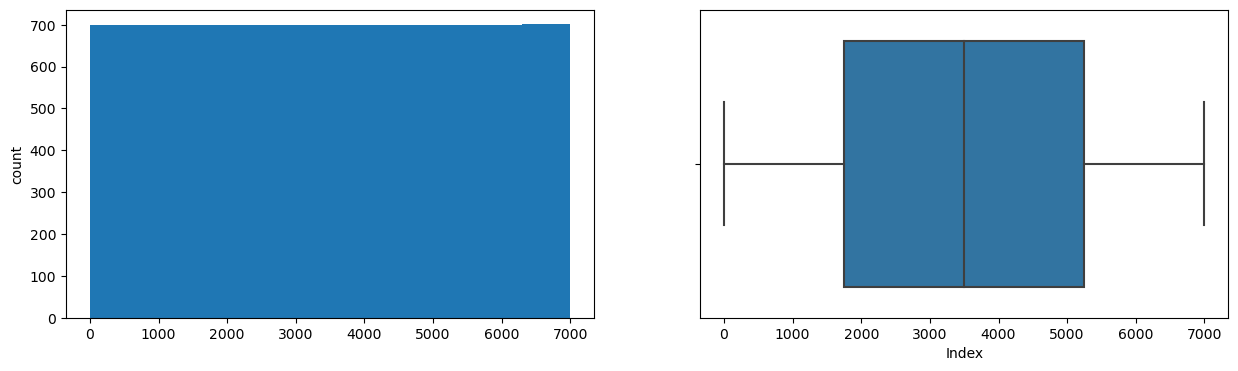

Rating(Out of 10)
Skew : -1.03


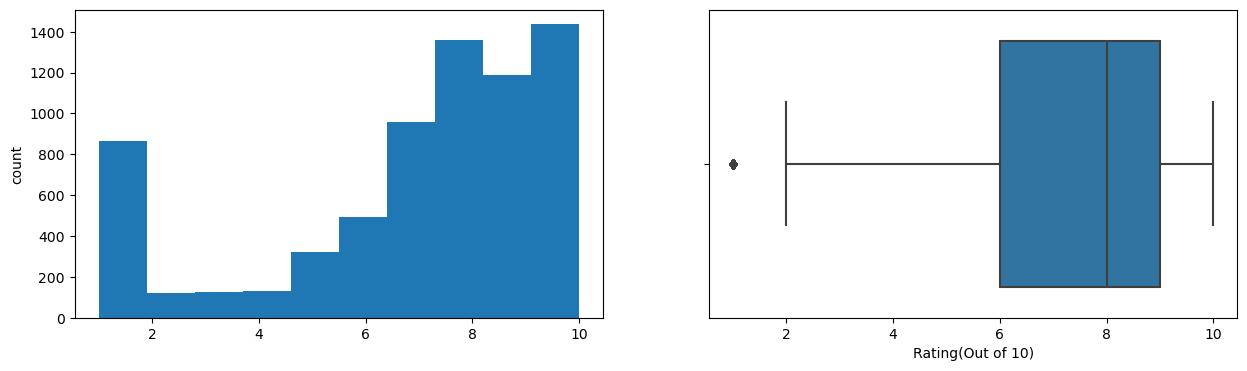

In [22]:
#Step 9: EDA Univariate Analysis
#Analyzing/visualizing the dataset by taking one variable at a time:
for col in num_cols:
    print(col)
    print('Skew :', round(data[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    data[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col])
    plt.show()